In [1]:
!pip install pystan~=2.14
!pip install fbprophet
!pip install pandas-datareader


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.6/62.6 MB 12.4 MB/s eta 0:00:00
  Attempting uninstall: pystan
    Found existing installation: pystan 3.3.0
    Uninstalling pystan-3.3.0:
      Successfully uninstalled pystan-3.3.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.0/64.0 KB 5.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for fbprophet: filename=fbprophet-0.7.1-py3-none-any.whl size=9537128 sha256=e7808c34912d64eb4763af6bba43aeb9df6a56e273bfb33e04a218eb4d37d52d
  Stored in directory: /root/.cache/pip/wheels/d0/d2/ae/c579b7fd160999d35908f3cb8ebcad7ef64ecaca7b78e4c3c8
Successfully built fbprophet
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 1.1.0
    Uninstalling cmdstanpy-1.1.0:
      Successfully uninstalled cmdsta

In [2]:
!pip install --upgrade pandas-datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.5/109.5 KB 11.1 MB/s eta 0:00:00
  Attempting uninstall: pandas-datareader
    Found existing installation: pandas-datareader 0.9.0
    Uninstalling pandas-datareader-0.9.0:
      Successfully uninstalled pandas-datareader-0.9.0


In [3]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot
import pandas as pd
from sklearn.metrics import mean_absolute_error
from fbprophet import Prophet
import pandas_datareader as pdr

In [4]:
!pip install --upgrade pandas
!pip install --upgrade pandas-datareader




Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 79.5 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 1.3.5
    Uninstalling pandas-1.3.5:
      Successfully uninstalled pandas-1.3.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
prophet 1.1.2 requires cmdstanpy>=1.0.4, but you have cmdstanpy 0.9.5 which is incompatible.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
#stock = input("Enter the nasadq index: \n")
#df = pdr.get_data_yahoo(stock)
#df = pdr.get_data_yahoo('TSLA')

df=pd.read_csv("Tel1.csv")
df

,date,T2M,RH2M,WS2M,WD2M,ALLSKY_KT,GWETTOP,EVLAND,PS,PRECIPITATIONCAL,MEI,PC1,PC2,amplitude
0,01-01-2015,23.55,65.12,1.75,130.69,0.38,0.37,9.94,97.12,24.31,0.23,-1.40015,0.96675,1.70148
1,02-01-2015,23.34,71.88,1.88,141.00,0.43,0.54,17.78,97.40,1.00,0.23,-1.74316,1.00767,2.01346
2,03-01-2015,20.17,88.62,1.87,154.25,0.16,0.66,14.37,97.60,3.82,0.23,-2.03657,1.02990,2.28217
3,04-01-2015,20.72,74.56,2.25,73.00,0.34,0.56,18.38,97.74,0.00,0.23,-2.26712,1.02739,2.48905
4,05-01-2015,18.68,59.81,2.09,18.50,0.66,0.53,16.19,97.75,0.00,0.23,-2.42346,0.99678,2.62044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2552,27-12-2021,21.01,73.19,0.92,113.75,0.40,0.59,17.79,97.73,0.00,-1.21,-0.70756,0.47105,0.85002
2553,28-12-2021,21.53,79.25,1.87,172.38,0.45,0.60,20.85,97.62,3.24,-1.21,-0.65159,0.47253,0.80489
2554,29-12-2021,20.45,83.62,1.76,184.44,0.38,0.62,18.86,97.65,0.00,-1.21,-0.55501,0.44320,0.71026
2555,30-12-2021,18.71,83.50,2.71,53.75,0.44,0.61,15.57,97.98,0.00,-1.21,-0.42160,0.38602,0.57163


In [6]:
df=df.reset_index()
df.rename(columns={'date': 'ds', 'T2M': 'y'}, inplace=True)

In [7]:
df

,index,ds,y,RH2M,WS2M,WD2M,ALLSKY_KT,GWETTOP,EVLAND,PS,PRECIPITATIONCAL,MEI,PC1,PC2,amplitude
0,0,01-01-2015,23.55,65.12,1.75,130.69,0.38,0.37,9.94,97.12,24.31,0.23,-1.40015,0.96675,1.70148
1,1,02-01-2015,23.34,71.88,1.88,141.00,0.43,0.54,17.78,97.40,1.00,0.23,-1.74316,1.00767,2.01346
2,2,03-01-2015,20.17,88.62,1.87,154.25,0.16,0.66,14.37,97.60,3.82,0.23,-2.03657,1.02990,2.28217
3,3,04-01-2015,20.72,74.56,2.25,73.00,0.34,0.56,18.38,97.74,0.00,0.23,-2.26712,1.02739,2.48905
4,4,05-01-2015,18.68,59.81,2.09,18.50,0.66,0.53,16.19,97.75,0.00,0.23,-2.42346,0.99678,2.62044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2552,2552,27-12-2021,21.01,73.19,0.92,113.75,0.40,0.59,17.79,97.73,0.00,-1.21,-0.70756,0.47105,0.85002
2553,2553,28-12-2021,21.53,79.25,1.87,172.38,0.45,0.60,20.85,97.62,3.24,-1.21,-0.65159,0.47253,0.80489
2554,2554,29-12-2021,20.45,83.62,1.76,184.44,0.38,0.62,18.86,97.65,0.00,-1.21,-0.55501,0.44320,0.71026
2555,2555,30-12-2021,18.71,83.50,2.71,53.75,0.44,0.61,15.57,97.98,0.00,-1.21,-0.42160,0.38602,0.57163


In [8]:
df.isna().sum()

index               0
ds                  0
y                   0
RH2M                0
WS2M                0
WD2M                0
ALLSKY_KT           0
GWETTOP             0
EVLAND              0
PS                  0
PRECIPITATIONCAL    0
MEI                 0
PC1                 0
PC2                 0
amplitude           0
dtype: int64

In [9]:
df.describe()

,index,y,RH2M,WS2M,WD2M,ALLSKY_KT,GWETTOP,EVLAND,PS,PRECIPITATIONCAL,MEI,PC1,PC2,amplitude
count,2557.000000,2557.000000,2557.000000,2557.000000,2557.000000,2557.000000,2557.000000,2557.000000,2557.000000,2557.000000,2557.000000,2557.000000,2557.000000,2557.000000
mean,1278.000000,26.977227,56.833848,2.173031,174.222980,0.544302,0.497826,24.915170,97.066547,3.027673,-0.071991,-0.006031,-0.000786,1.113203
std,738.286643,5.001340,25.049452,0.941942,89.868433,0.135996,0.262406,22.181317,0.475143,9.462778,0.963110,0.904152,0.872560,0.582394
min,0.000000,14.250000,7.190000,0.580000,16.000000,0.050000,0.100000,0.090000,95.780000,0.000000,-1.530000,-2.496940,-2.598810,0.011970
25%,639.000000,23.910000,32.120000,1.490000,94.690000,0.470000,0.230000,3.000000,96.660000,0.000000,-0.790000,-0.633300,-0.585890,0.673900
50%,1278.000000,26.380000,60.500000,1.910000,166.190000,0.580000,0.520000,20.020000,97.050000,0.000000,-0.240000,-0.024300,0.039390,1.039910
75%,1917.000000,29.800000,81.000000,2.660000,260.120000,0.650000,0.730000,44.400000,97.480000,0.870000,0.350000,0.635940,0.563920,1.491530
max,2556.000000,39.080000,95.690000,7.470000,340.500000,0.770000,0.980000,77.000000,98.090000,113.050000,2.210000,2.875470,2.840250,2.886400


In [10]:
df.describe

<bound method NDFrame.describe of       index          ds      y   RH2M  WS2M    WD2M  ALLSKY_KT  GWETTOP  \
0         0  01-01-2015  23.55  65.12  1.75  130.69       0.38     0.37   
1         1  02-01-2015  23.34  71.88  1.88  141.00       0.43     0.54   
2         2  03-01-2015  20.17  88.62  1.87  154.25       0.16     0.66   
3         3  04-01-2015  20.72  74.56  2.25   73.00       0.34     0.56   
4         4  05-01-2015  18.68  59.81  2.09   18.50       0.66     0.53   
...     ...         ...    ...    ...   ...     ...        ...      ...   
2552   2552  27-12-2021  21.01  73.19  0.92  113.75       0.40     0.59   
2553   2553  28-12-2021  21.53  79.25  1.87  172.38       0.45     0.60   
2554   2554  29-12-2021  20.45  83.62  1.76  184.44       0.38     0.62   
2555   2555  30-12-2021  18.71  83.50  2.71   53.75       0.44     0.61   
2556   2556  31-12-2021  19.19  78.88  1.81   55.62       0.44     0.59   

      EVLAND     PS  PRECIPITATIONCAL   MEI      PC1      PC2  am

In [11]:
df.shape

(2557, 15)

In [12]:
df=df.dropna()

In [13]:
import numpy as np
from sklearn.impute import SimpleImputer
mean_imputer = SimpleImputer(missing_values=np.nan,strategy="mean")
mean_imputer.fit_transform((df['y'].values).reshape(-1,1))

array([[23.55],
       [23.34],
       [20.17],
       ...,
       [20.45],
       [18.71],
       [19.19]])

<AxesSubplot:xlabel='y'>

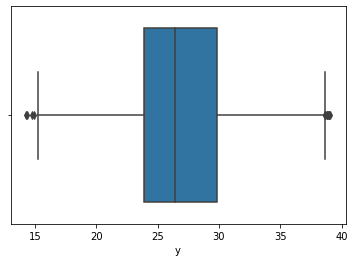

In [14]:
import seaborn as sns
sns.boxplot(x=df['y'])

In [15]:
# q1 = df.quantile(0.25)
# q3 = df.quantile(0.75)
# iqr = q3-q1
# print((df['y']<(q1-1.5*iqr)) | (df['y']>(q3+1.5*iqr)))

In [16]:
model = Prophet()
model.fit(df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [17]:
model.component_modes

{'additive': ['yearly',
  'weekly',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

In [18]:
future_dates=model.make_future_dataframe(periods=30)

In [19]:
future_dates.tail()

,ds
2582,2022-01-26
2583,2022-01-27
2584,2022-01-28
2585,2022-01-29
2586,2022-01-30


In [20]:
prediction = model.predict(future_dates)

In [21]:
prediction.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
2582,2022-01-26,26.170512,17.471815,27.511801,26.170444,26.170516,-3.605946,-3.605946,-3.605946,0.083727,0.083727,0.083727,-3.689673,-3.689673,-3.689673,0.0,0.0,0.0,22.564566
2583,2022-01-27,26.169661,17.482918,27.564201,26.169586,26.169673,-3.560922,-3.560922,-3.560922,-0.008690,-0.008690,-0.008690,-3.552232,-3.552232,-3.552232,0.0,0.0,0.0,22.608739
2584,2022-01-28,26.168810,17.987751,27.747247,26.168726,26.168827,-3.523753,-3.523753,-3.523753,-0.128820,-0.128820,-0.128820,-3.394933,-3.394933,-3.394933,0.0,0.0,0.0,22.645057
2585,2022-01-29,26.167959,17.775600,28.144766,26.167858,26.167981,-3.157674,-3.157674,-3.157674,0.062587,0.062587,0.062587,-3.220261,-3.220261,-3.220261,0.0,0.0,0.0,23.010286
2586,2022-01-30,26.167109,17.861181,28.255183,26.167001,26.167132,-3.017071,-3.017071,-3.017071,0.014038,0.014038,0.014038,-3.031109,-3.031109,-3.031109,0.0,0.0,0.0,23.150037


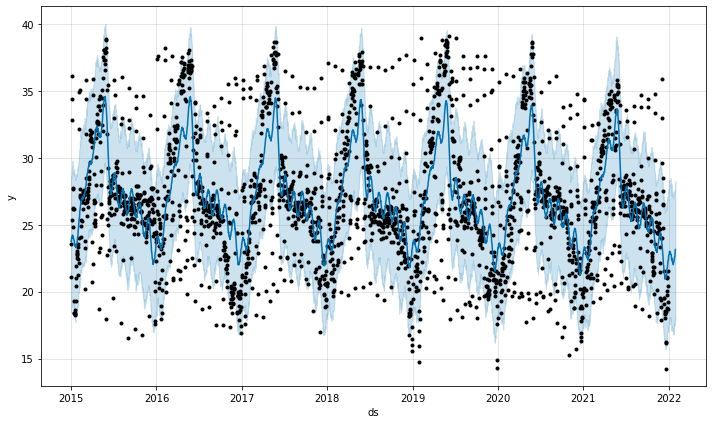

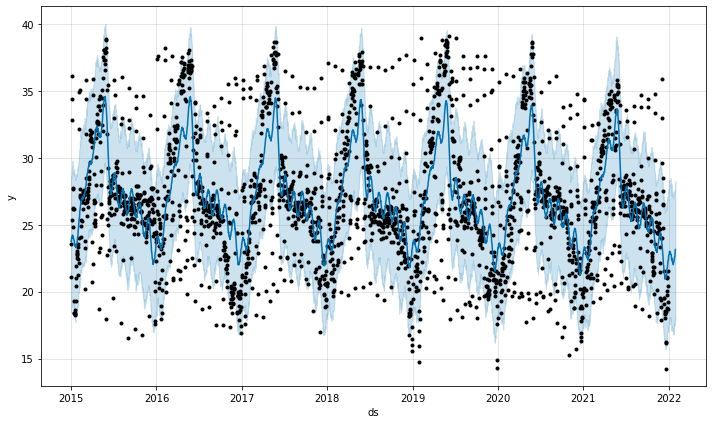

In [22]:
model.plot(prediction)

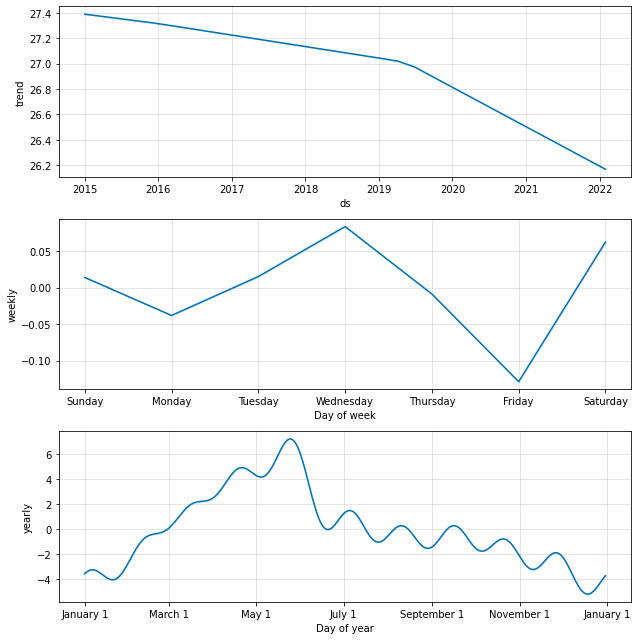

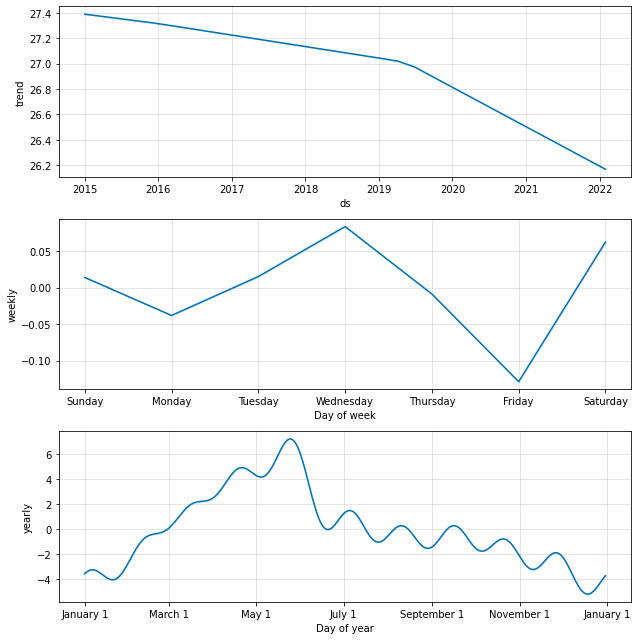

In [23]:
model.plot_components(prediction)

In [25]:
prediction.tail(60)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
2527,2021-12-02,26.217301,18.638349,28.804192,26.217301,26.217301,-2.368795,-2.368795,-2.368795,-0.008690,-0.008690,-0.008690,-2.360105,-2.360105,-2.360105,0.0,0.0,0.0,23.848506
2528,2021-12-03,26.216450,18.647986,28.898481,26.216450,26.216450,-2.666311,-2.666311,-2.666311,-0.128820,-0.128820,-0.128820,-2.537490,-2.537490,-2.537490,0.0,0.0,0.0,23.550140
2529,2021-12-04,26.215600,18.108530,28.831324,26.215600,26.215600,-2.673056,-2.673056,-2.673056,0.062587,0.062587,0.062587,-2.735643,-2.735643,-2.735643,0.0,0.0,0.0,23.542544
2530,2021-12-05,26.214749,18.600071,28.083820,26.214749,26.214749,-2.936561,-2.936561,-2.936561,0.014038,0.014038,0.014038,-2.950599,-2.950599,-2.950599,0.0,0.0,0.0,23.278188
2531,2021-12-06,26.213898,17.778085,28.190475,26.213898,26.213898,-3.216006,-3.216006,-3.216006,-0.038082,-0.038082,-0.038082,-3.177924,-3.177924,-3.177924,0.0,0.0,0.0,22.997892
2532,2021-12-07,26.213048,17.939768,28.097913,26.213048,26.213048,-3.397596,-3.397596,-3.397596,0.015240,0.015240,0.015240,-3.412837,-3.412837,-3.412837,0.0,0.0,0.0,22.815451
2533,2021-12-08,26.212197,17.350265,27.406279,26.212197,26.212197,-3.566608,-3.566608,-3.566608,0.083727,0.083727,0.083727,-3.650335,-3.650335,-3.650335,0.0,0.0,0.0,22.645589
2534,2021-12-09,26.211346,17.341181,27.608147,26.211346,26.211346,-3.894025,-3.894025,-3.894025,-0.008690,-0.008690,-0.008690,-3.885335,-3.885335,-3.885335,0.0,0.0,0.0,22.317321
2535,2021-12-10,26.210495,16.972120,26.905635,26.210495,26.210495,-4.241628,-4.241628,-4.241628,-0.128820,-0.128820,-0.128820,-4.112807,-4.112807,-4.112807,0.0,0.0,0.0,21.968868
2536,2021-12-11,26.209645,16.671262,27.170261,26.209645,26.209645,-4.265326,-4.265326,-4.265326,0.062587,0.062587,0.062587,-4.327913,-4.327913,-4.327913,0.0,0.0,0.0,21.944319


In [30]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,mean_absolute_percentage_error
from math import sqrt
print(sqrt(mean_squared_error(df["y"].iloc[-31:], prediction["yhat"].loc[2526:2556])))
print(mean_absolute_error(df["y"].iloc[-31:],prediction["yhat"].loc[2526:2556])) 
print(mean_absolute_percentage_error(df["y"].iloc[-31:],prediction["yhat"].loc[2526:2556]))

3.0690173075043488
2.715178573409372
0.14728529776993618
